In [1]:
import cv2
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()

# 1. 순방향 변환

512 512


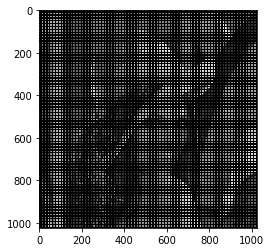

In [2]:
src = cv2.imread("lenna.bmp", 0)
height, width = src.shape

print(height, width)

dst = np.zeros((height*2, width*2), src.dtype   )

for r  in range(height):
    for c in range(width):
        dst[r*2, c*2] = src[r,c]        
imshow("", dst)

512 512


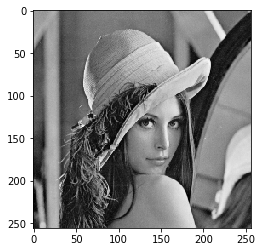

In [5]:
src = cv2.imread("lenna.bmp", 0)
height, width = src.shape

print(height, width)

dst = np.zeros((int(height/2), int(width/2)), src.dtype   )

for r  in range(height):
    for c in range(width):
        dst[int(r/2.0), int(c/2.0)] = src[r,c]        
imshow("", dst)

# 2. 역방향 변환

512 512


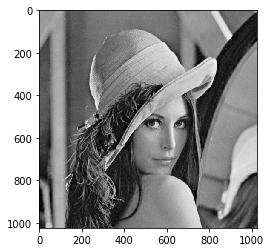

(1024, 1024)


In [8]:
src = cv2.imread("lenna.bmp", 0)
height, width = src.shape

print(height, width)

dst = np.zeros((height*2, width*2), src.dtype   )
height2, width2 = dst.shape

for r  in range(height2):
    for c in range(width2):
        dst[r, c] = src[int(r/2.0), int(c / 2.0)]        
imshow("", dst)
print(dst.shape)

512 512


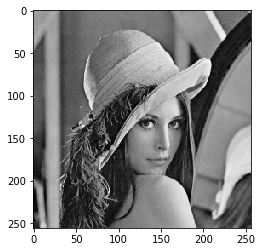

(256, 256)


In [10]:
src = cv2.imread("lenna.bmp", 0)
height, width = src.shape

print(height, width)

dst = np.zeros((int(height/2), int(width/2)), src.dtype )
height2, width2 = dst.shape

for r  in range(height2):
    for c in range(width2):
        dst[r, c] = src[int(r*2), int(c * 2)]        
imshow("", dst)
print(dst.shape)

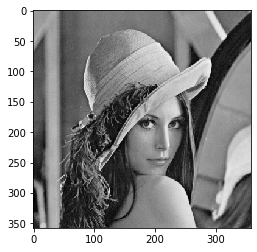

In [15]:
s = 0.7 #   s = 2.0
src = cv2.imread("lenna.bmp", 0)
height, width = src.shape

dst = np.zeros((int(height*s), int(width*s)), src.dtype )
height2, width2 = dst.shape

for r  in range(height2):
    for c in range(width2):
        dst[r, c] = src[int(r/s), int(c/s)]        
imshow("", dst)

# 3. affine 행렬 M

In [19]:
M = np.array( [[1,0,50], [0,1, -30]] )   # 2x3  3x1

p = np.array( [[5,6,7,8,9,10], [7,7,7,7,7,7], [1,1,1,1,1,1]] )

np.matmul(M, p)     #  5+50=55   7-30=-23

array([[ 55,  56,  57,  58,  59,  60],
       [-23, -23, -23, -23, -23, -23]])

# 4. 확대/축소

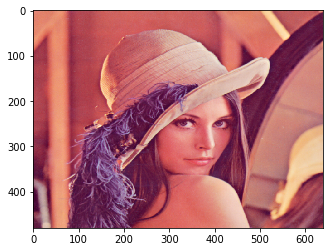

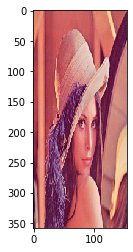

In [20]:
src = cv2.imread("lenna.bmp")

dst = cv2.resize(src, dsize=(640, 480))
dst2 = cv2.resize(src, dsize=(0, 0), fx=0.3, fy=0.7)

imshow("", dst)
imshow("", dst2)

In [32]:
src = cv2.imread("lenna.bmp")

dst = cv2.resize(src, dsize=(0, 0), fx=0.1, fy=0.1, interpolation=0)
dst = cv2.resize(dst, dsize=(0, 0), fx=10.0, fy=10.0, interpolation=0)

dst2 = cv2.resize(src, dsize=(0, 0), fx=0.1, fy=0.1, interpolation=1)
dst2 = cv2.resize(dst2, dsize=(0, 0), fx=10.0, fy=10.0, interpolation=1)

cv2.imshow('dst', dst)
cv2.imshow('dst2', dst2)

cv2.waitKey()
cv2.destroyAllWindows()

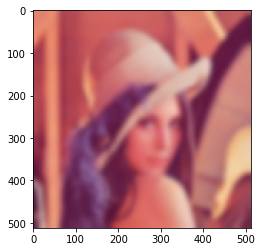

In [33]:
src = cv2.imread("lenna.bmp")
for i in range(3) :
     src = cv2.pyrDown (src);
for i in range(3) :
     src = cv2.pyrUp (src);              
imshow("", src)

# 5. M을 이용한 transformation

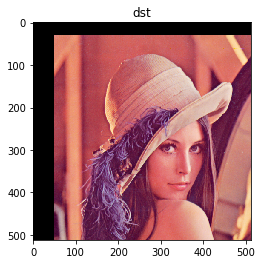

In [39]:
src = cv2.imread('lenna.bmp')

affine_mat = np.array([[1, 0, 50],
                       [0, 1, 30]]).astype(np.float32)

dst = cv2.warpAffine(src, affine_mat, (0,0))

imshow('dst', dst)

[[   1.47224319    0.85       -338.49425573]
 [  -0.85          1.47224319   96.70574427]]


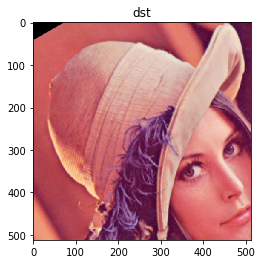

In [57]:
src = cv2.imread('lenna.bmp')
cp = (src.shape[1] / 2, src.shape[0] / 2)
affine_mat = cv2.getRotationMatrix2D(cp, 30, 1.7)
print(affine_mat)
affine_mat[0, 2] += 90
affine_mat[1, 2] += 90

dst = cv2.warpAffine(src, affine_mat, (0, 0))

imshow('dst', dst)   

In [1]:
def on_mouse(event, x, y, flags, param):
    global cnt, src_pts
    if event == cv2.EVENT_LBUTTONDOWN:
        if cnt < 4:
            src_pts[cnt, :] = np.array([x, y]).astype(np.float32)
            cnt += 1

            cv2.circle(src, (x, y), 5, (0, 0, 255), -1)
            cv2.imshow('src', src)
        
        if cnt == 4:
            w = 200   # 명함  400,200
            h = 300

            dst_pts = np.array([[0, 0],
                                [w - 1, 0],
                                [w - 1, h - 1],
                                [0, h - 1]]).astype(np.float32)

            pers_mat = cv2.getPerspectiveTransform(src_pts, dst_pts)

            dst = cv2.warpPerspective(src, pers_mat, (w, h))

            cv2.imshow('dst', dst)


cnt = 0
src_pts = np.zeros([4, 2], dtype=np.float32)
src = cv2.imread('white.jpg')

if src is None:
    print('Image load failed!')
    
cv2.namedWindow('src')
cv2.setMouseCallback('src', on_mouse)

cv2.imshow('src', src)
cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'np' is not defined